In [1]:
import os
import sys
import argparse
from codebase import args as codebase_args
from pprint import pprint
import tensorflow as tf
from codebase.utils import get_data
from codebase.utils import exact_accuracy
import numpy as np
from glob import glob
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib as plt

In [2]:
def build_model(src, trg, design, trim):
    parser = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
    parser.add_argument('--src',    type=str,   default='stl', help="Src data")
    parser.add_argument('--trg',    type=str,   default='cifar',    help="Trg data")
    parser.add_argument('--design', type=str,   default='v17_y_nin',     help="design")
    parser.add_argument('--trim',   type=int,   default=5,         help="Trim")
    parser.add_argument('--pert',   type=str,   default='vat',     help="Type of perturbation")
    parser.add_argument('--ball',   type=float, default=3.5,       help="Ball weight")
    parser.add_argument('--cw',     type=float, default=0,      help="Conditional entropy weight")
    parser.add_argument('--dw',     type=float, default=0,      help="Domain weight")
    parser.add_argument('--gw',     type=float, default=0.0,       help="Gen weight")
    parser.add_argument('--y-emp',  type=int,   default=0,         help="Whether to use empirical y")
    parser.add_argument('--te',     type=float, default=0,         help="Trg embedding ball weight")
    parser.add_argument('--se',     type=float, default=0,         help="Src embedding ball weight")
    parser.add_argument('--tbw',    type=float, default=0,      help="Trg ball weight")
    parser.add_argument('--gbw',    type=float, default=0.0,       help="Fake ball weight")
    parser.add_argument('--sbw',    type=float, default=0,         help="Src ball weight")
    parser.add_argument('--lr',     type=float, default=1e-3,      help="Learning rate")
    parser.add_argument('--dirt',   type=int,   default=50000,         help="Flag for DIRT algorithm")
    parser.add_argument('--init',   type=int,   default=0,         help="Flag for re-init")
    parser.add_argument('--pivot',  type=int,   default=90000,     help="Pivot iteration for up/dn/dwdn")
    parser.add_argument('--uval',   type=float, default=0,         help="Up value")
    parser.add_argument('--dcval',  type=float, default=0,         help="Down value. Does not apply to SBW!")
    parser.add_argument('--up',     type=int,   default=0,         help="Ramping up flag")
    parser.add_argument('--dn',     type=int,   default=0,         help="Ramping down flag")
    parser.add_argument('--dwdn',   type=int,   default=0,         help="Ramping down dw flag")
    parser.add_argument('--phase',  type=int,   default=0,         help="Init phase v. DIRT phase")
    parser.add_argument('--run',    type=int,   default=999,       help="Run index")
    codebase_args.args = args = parser.parse_args([])

    args.src = src
    args.trg = trg
    args.design = design 
    args.trim = trim
    
    from codebase.models.dann_embed import dann_embed

    tf.reset_default_graph()
    M = dann_embed()
    M.sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
#    trg = get_data(args.trg)
    
    return M, saver, trg

def get_accuracy(M, saver, trg, restoration_names, iteration=80000):
    train_test_list = []
    for rn in restoration_names:
        path = os.path.join('checkpoints', rn, 'model-{:05d}'.format(iteration))

        try:
            saver.restore(M.sess, path)
            test_acc, _ = exact_accuracy(M.fn_ema_acc, 'whatev', trg.test, full=True)
            train_acc, _ = exact_accuracy(M.fn_ema_acc, 'whatev', trg.train, full=False)    
            train_test_list += [[train_acc, test_acc]]
            print train_test_list[-1]

        except tf.errors.NotFoundError:
            print "NOT FOUND"
            
    return np.array(train_test_list)

# Evaluation

```
IN:
log=baseline/*src=mnist*trg=svhn*design=v11_y_dw*
```

In [3]:
src = get_data('wifistanford')
trg = get_data('wifimexico')

Loading WifiStanford
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180220_01/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180220_01/05600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180220_01/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180220_01/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180220_01/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180220_01/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180220_01/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_

../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_01/09200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_01/09400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_01/09600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_01/09800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_01/10000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_01/10200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_01/10400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_02/14000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_02/14200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_02/14400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_02/14600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_02/14800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_02/15000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180220_02/15200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180220_01/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180220_01/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180220_01/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180220_01/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180220_01/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180220_01/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180220_01/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_

../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_02/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_03/05600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_03/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_03/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_03/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_03/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_03/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_

../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_02/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_02/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_02/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_02/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_02/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_02/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_02/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_03/09600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_03/09800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_03/10000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_03/10200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_03/10400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_03/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180220_03/10800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_104_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_03/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_03/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_03/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_03/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_03/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_03/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_03/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180208_02/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180208_02/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180208_02/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180208_02/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180208_02/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180208_03/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180208_03/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLO

../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_01/14600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_01/14800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_01/15000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_01/15200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_01/15400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_02/05000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_02/05200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_03/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_03/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_03/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_03/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_03/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_03/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_03/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180208_02/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180208_02/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180208_02/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180208_02/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180208_02/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180208_02/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180208_02/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_

../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_01/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_01/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_01/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_01/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_01/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_01/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_01/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_02/09600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_02/09800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_02/10000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_02/10200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_02/10400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_02/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_02/10800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_03/12000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_03/12200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_03/12400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_03/12600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_03/12800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_03/13000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_03/13200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_200_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180212_03/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180212_03/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180212_03/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180212_03/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180212_03/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180212_03/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180212_03/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=

../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180212_02/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180212_02/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180212_02/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180212_02/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180212_02/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180212_03/05200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180212_03/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window

../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_01/14400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_01/14600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_01/14800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_01/15000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_02/05000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_02/05200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_02/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=

../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_03/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_03/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_03/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_03/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_03/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_03/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_03/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=

../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180212_02/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180212_02/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180212_02/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180212_03/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180212_03/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180212_03/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180212_03/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS

../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_01/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_01/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_01/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_01/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_01/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_01/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_01/09000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_thr

../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_02/11200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_02/11400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_02/11600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_02/11800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_02/12000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_02/12200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_02/12400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_201_LOS_window_size=2000_thr

../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180214_01/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180214_01/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180214_01/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180214_01/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180214_01/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180214_01/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180214_01/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180214_01/04800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180214_01/05000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180214_01/05200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180214_01/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180214_01/05600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180214_01/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180214_01/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LO

../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_01/09800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_01/10000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_01/10200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_01/10400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_01/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_01/10800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_01/11000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_02/11400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_02/11600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_02/11800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_02/12000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_02/12200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_02/12400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_02/12600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_03/15400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_03/15600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180214_01/05200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180214_01/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180214_01/05600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180214_01/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180214_01/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS

../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180214_03/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180214_03/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180214_03/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180214_03/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_01/03800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_01/04000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_01/04200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_

../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_02/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_02/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_02/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_02/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_02/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_02/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_02/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_03/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_03/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_03/09000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_03/09200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_03/09400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_03/09600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_03/09800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_LOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180225_03/10400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180225_03/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180225_03/10800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180225_03/11000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180225_03/11200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180225_03/11400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180225_03/11600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size

../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180225_03/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180225_03/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180225_03/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180225_03/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180225_03/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180225_03/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180225_03/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_

../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_02/09400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_02/09600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_02/09800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_02/10000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_02/10200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_02/10400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_02/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size

../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_03/13600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_03/13800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_03/14000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_03/14200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_03/14400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_03/14600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_03/14800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size

../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180225_02/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180225_02/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180225_02/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180225_02/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180225_02/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180225_02/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180225_03/06600.pkl
../Pickle/norm/non_smooth/source/train/St

../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_02/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_02/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_02/09000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_02/09200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_02/09400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_02/09600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_02/09800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_wind

../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_03/13200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_03/13400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_03/13600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_03/13800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_03/14000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_03/14200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_03/14400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_219A_NLOS_wind

../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180216_03/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180216_03/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180216_03/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180216_03/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180216_03/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180216_03/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180216_03/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=

../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180216_02/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180216_03/04400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180216_03/04600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180216_03/04800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180216_03/05000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180216_03/05200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180216_03/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window

../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_01/15200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_02/05000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_02/05200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_02/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_02/05600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_02/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_02/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=

../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_03/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_03/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_03/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_03/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_03/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_03/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_03/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=

../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180216_02/05000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180216_02/05200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180216_02/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180216_02/05600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180216_02/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180216_02/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180216_02/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS

../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180216_03/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_01/05200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_01/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_01/05600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_01/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_01/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_01/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_

../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_02/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_02/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_02/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_02/09000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_02/09200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_02/09400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_02/09600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_thr

../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_03/11400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_03/11600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_03/11800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_03/12000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_03/12200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_03/12400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_03/12600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_LOS_window_size=2000_thr

../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180124_01/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180124_01/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180124_01/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180124_01/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180124_01/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180124_02/04800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180124_02/05000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_03/05000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_03/05200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_03/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_03/05600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_03/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_03/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_03/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLO

../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_02/05000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_02/05200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_02/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_02/05600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_02/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_02/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_02/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_03/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_03/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_03/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_03/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_03/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_03/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180124_03/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180124_02/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180124_02/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180124_02/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180124_02/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180124_02/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180124_02/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180124_03/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_

../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_01/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_01/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_01/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_01/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_01/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_01/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_01/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_02/11000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_02/11200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_02/11400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_02/11600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_02/11800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_02/12000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_02/12200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_03/12800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_03/13000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_03/13200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_03/13400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_03/13600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_03/13800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_03/14000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_229_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180221_01/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180221_01/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180221_01/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180221_01/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180221_02/05200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180221_02/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180221_02/05600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_01/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_01/05600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_01/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_01/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_01/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_01/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_01/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_02/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_02/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_02/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_02/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_02/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_02/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_02/09000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_03/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_03/10800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_03/11000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_03/11200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_03/11400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_03/11600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_03/11800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180221_02/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180221_03/05600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180221_03/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180221_03/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180221_03/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180221_03/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180221_03/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_

../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_01/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_01/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_01/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_01/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_01/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_01/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_01/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_02/10000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_02/10200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_02/10400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_02/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_02/10800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_02/11000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_02/11200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_03/12600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_03/12800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_03/13000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_03/13200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_03/13400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_03/13600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_03/13800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_259_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180206_03/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180206_03/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180206_03/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180206_03/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180206_03/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180206_03/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180206_03/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180206_03/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180206_03/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180206_03/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180206_03/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180206_03/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180206_03/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180206_03/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLO

../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_01/12200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_01/12400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_01/12600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_01/12800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_01/13000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_01/13200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_01/13400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_03/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_03/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_03/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_03/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_03/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_03/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_03/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180206_02/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180206_02/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180206_02/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180206_02/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180206_02/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180206_02/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180206_03/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_

../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_01/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_01/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_01/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_01/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_01/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_01/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_01/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_02/10200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_02/10400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_02/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_02/10800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_02/11000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_02/11200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_02/11400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_03/12600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_03/12800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_03/13000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_03/13200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_03/13400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_03/13600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_03/13800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_260_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180217_01/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180217_01/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180217_01/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180217_01/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180217_01/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180217_01/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180217_02/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_01/05400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_01/05600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_01/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_01/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_01/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_01/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_01/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_02/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_02/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_02/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_02/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_02/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_02/09000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_02/09200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_03/10400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_03/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_03/10800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_03/11000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_03/11200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_03/11400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180217_03/11600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_th

../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180217_03/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180217_03/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180217_03/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180217_03/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180217_03/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180217_01/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180217_01/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_

../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_01/10200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_01/10400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_01/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_01/10800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_01/11000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_01/11200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_01/11400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_02/13400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_02/13600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_02/13800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_02/14000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_02/14200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_02/14400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_02/14600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_423_NLOS_window_size=

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_1/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_1/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_1/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_1/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_1/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_1/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_1/08600.pkl
../Pickle/norm/non_smooth/source/t

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_5/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_5/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_6/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_6/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_6/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_6/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_bed_6/07000.pkl
../Pickle/norm/non_smooth/source/t

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_fall_6/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_1/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_1/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_1/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_1/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_1/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_1/07000.pkl
../Pickle/norm/

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_6/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_6/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_6/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_6/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_6/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_6/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_6/08400.pkl
../Pickle/nor

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_2/09000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_2/09200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_2/09400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_2/09600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_2/09800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_2/10000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_2/10200.pkl
../Pickle/norm/non_smooth/source/t

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_3/12800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_3/13000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_3/13200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_3/13400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_3/13600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_3/13800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_3/14000.pkl
../Pickle/norm/non_smooth/source/t

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_5/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_5/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_5/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_5/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_5/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_5/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_5/08400.pkl
../Pickle/norm/non_smooth/source/t

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_6/09800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_6/10000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_6/10200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_6/10400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_6/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_6/10800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_6/11000.pkl
../Pickle/norm/non_smooth/source/t

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_sitdown_3/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_sitdown_3/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_sitdown_3/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_sitdown_3/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_sitdown_3/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_sitdown_4/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_sitdown_4/06600.pkl
../Pic

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_standup_3/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_standup_3/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_standup_3/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_standup_4/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_standup_4/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_standup_4/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_standup_4/07400.pkl
../Pic

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_1/14800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_1/15000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_1/15200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_1/15400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_1/15600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_1/15800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_1/16000.pkl
../Pickle/norm/non_smooth/s

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_3/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_3/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_3/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_3/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_3/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_3/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_3/08800.pkl
../Pickle/norm/non_smooth/s

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_4/11000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_4/11200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_4/11400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_4/11600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_4/11800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_4/12000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_4/12200.pkl
../Pickle/norm/non_smooth/s

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_5/14800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_5/15000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_5/15200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_5/15400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_5/15600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_5/15800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_6/06600.pkl
../Pickle/norm/non_smooth/s

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_1/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_1/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_1/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_1/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_1/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_1/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_1/07800.pkl
../Pickle/norm/non_smooth/source/train/St

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_5/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_6/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_6/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_6/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_6/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_6/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_6/07400.pkl
../Pickle/norm/non_smooth/source/train/St

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_fall_6/04400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_fall_6/04600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_fall_6/04800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_fall_6/05000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_fall_6/05200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_pickup_1/04400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_pickup_1/04600.pkl
../Pickle/norm/non_smooth/sour

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_pickup_6/05800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_pickup_6/06000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_pickup_6/06200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_pickup_6/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_pickup_6/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_pickup_6/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_pickup_6/07000.pkl
../Pickle/norm/non_s

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_2/09600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_2/09800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_2/10000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_2/10200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_2/10400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_2/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_2/10800.pkl
../Pickle/norm/non_smooth/source/train/St

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_3/12400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_3/12600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_3/12800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_3/13000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_3/13200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_3/13400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_3/13600.pkl
../Pickle/norm/non_smooth/source/train/St

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_5/06400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_5/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_5/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_5/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_5/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_5/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_5/07600.pkl
../Pickle/norm/non_smooth/source/train/St

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_6/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_6/10800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_6/11000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_6/11200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_6/11400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_6/11600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_6/11800.pkl
../Pickle/norm/non_smooth/source/train/St

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_sitdown_4/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_sitdown_4/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_sitdown_5/06800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_sitdown_5/07000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_sitdown_5/07200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_sitdown_5/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_sitdown_5/07600.pkl
../Pickle/nor

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_standup_6/06600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_1/08000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_1/08200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_1/08400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_1/08600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_1/08800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_1/09000.pkl
../Pickle/norm/non_smooth/sourc

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_2/11200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_2/11400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_2/11600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_2/11800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_2/12000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_2/12200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_2/12400.pkl
../Pickle/norm/non_smooth/source/t

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_3/15000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_3/15200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_3/15400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_4/07400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_4/07600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_4/07800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_4/08000.pkl
../Pickle/norm/non_smooth/source/t

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_5/10200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_5/10400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_5/10600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_5/10800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_5/11000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_5/11200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_5/11400.pkl
../Pickle/norm/non_smooth/source/t

../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_6/14200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_6/14400.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_6/14600.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_6/14800.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_6/15000.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_6/15200.pkl
../Pickle/norm/non_smooth/source/train/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_6/15400.pkl
../Pickle/norm/non_smooth/source/t

../Pickle/norm/non_smooth/source/validation/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_04/05800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_04/06000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_04/06200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_04/06400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_04/06600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_04/06800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_104_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180220_04/07000.pkl
../Pickle/nor

../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_04/07400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_04/07600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_04/07800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_04/08000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_04/08200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_04/08400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180208_04/08600.pkl
../Pickle/norm/non_smooth/source/validati

../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_04/11800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_04/12000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_04/12200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_04/12400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_04/12600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_04/12800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180208_04/13000.pkl
../Pickle/norm/non_smooth/source/validati

../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_04/10600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_04/10800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_04/11000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_04/11200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_04/11400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_04/11600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_200_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180208_04/11800.pkl
../Pickle/norm/non_smooth/source/v

../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180212_04/07000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180212_04/07200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180212_04/07400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180212_04/07600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180212_04/07800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180212_04/08000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180212_04/05800.pkl
../Pickle/norm/non_smooth/sour

../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180212_04/08000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180212_04/08200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180212_04/08400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180212_04/08600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180212_04/08800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180212_04/09000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180212_04/05400.pkl
../Pickle/norm/non_s

../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_04/14200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_04/14400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_04/14600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_201_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180212_04/14800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180214_04/05400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180214_04/05600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180214_04/05800.pkl
../Pickle/norm/non_smooth/source/validati

../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_04/11200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_04/11400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_04/11600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_04/11800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_04/12000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_04/12200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180214_04/12400.pkl
../Pickle/norm/non_smooth/source/validati

../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_04/10800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_04/11000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_04/11200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_04/11400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_04/11600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_04/11800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180214_04/12000.pkl
../Pickle/norm/non_smooth/source/v

../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180225_04/09000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180225_04/09200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180225_04/09400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180225_04/09600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_04/04800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_04/05000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180225_04/05200.pkl
../Pickle/norm/non_smo

../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180225_04/08800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180225_04/09000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180225_04/09200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180225_04/09400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180225_04/09600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180225_04/06600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180225_04/06800.pkl
../Pic

../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_04/14800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_04/15000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_04/15200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_219A_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180225_04/15400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180216_04/05400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180216_04/05600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180216_04/05800.pkl
../Pickle/norm/non_smooth/source/val

../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_04/09400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_04/09600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_04/09800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_04/10000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_04/10200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_04/10400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180216_04/10600.pkl
../Pickle/norm/non_smooth/source/validation/Stan

../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_04/07000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_04/07200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_04/07400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_04/07600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_04/07800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_04/08000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_LOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180216_04/08200.pkl
../Pickle/norm/non_smooth/source/validati

../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_04/05200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_04/05400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_04/05600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_04/05800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_04/06000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_04/06200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180124_04/06400.pkl
../Pickle/norm/non_s

../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180124_04/05800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180124_04/06000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180124_04/06200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180124_04/06400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180124_04/06600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180124_04/06800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/standup_180124_04/05400.pkl
../Pickle/nor

../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_04/14400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_04/14600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_04/14800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_04/15000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_229_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180124_04/15200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180221_04/05600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180221_04/05800.pkl
../Pickle/norm/non_smooth/source/val

../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_04/07600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_04/07800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_04/08000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_04/08200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_04/08400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_04/08600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180221_04/08800.pkl
../Pickle/norm/non_smooth/source/validati

../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_04/06400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_04/06600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_04/06800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_04/07000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_04/07200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_04/07400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_259_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180221_04/07600.pkl
../Pickle/norm/non_smooth/source/v

../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/bed_180206_04/06800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180206_04/05000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180206_04/05200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180206_04/05400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180206_04/05600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180206_04/05800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/fall_180206_04/06000.pkl
../Pickle/norm/non_smooth/source/va

../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_04/12200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_04/12400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_04/12600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_04/12800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_04/13000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_04/13200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/run_180206_04/13400.pkl
../Pickle/norm/non_smooth/source/validati

../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_04/08800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_04/09000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_04/09200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_04/09400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_04/09600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_04/09800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_260_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180206_04/10000.pkl
../Pickle/norm/non_smooth/source/v

../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180217_04/05800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180217_04/06000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180217_04/06200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180217_04/06400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180217_04/06600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180217_04/06800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/pickup_180217_04/07000.pkl
../Pickle/norm/non_s

../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180217_04/05600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180217_04/05800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180217_04/06000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180217_04/06200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180217_04/06400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180217_04/06600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/sitdown_180217_04/06800.pkl
../Pickle/nor

../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_04/13000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_04/13200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_04/13400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_04/13600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_04/13800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_04/14000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_423_NLOS_window_size=2000_threshold=60_slide_siize=200_W400/walk_180217_04/14200.pkl
../Pickle/norm/non_smooth/source/v

../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_7/05800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_7/06000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_7/06200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_7/06400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_7/06600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_pickup_7/06800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sanka

../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_7/13400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_7/13600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_7/13800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_7/14000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_7/14200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_7/14400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_run_8/05400.pkl

../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_sitdown_8/07400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_sitdown_8/07600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_sitdown_8/07800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_standup_7/05400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_standup_7/05600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_standup_7/05800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219

../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_8/06400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_8/06600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_8/06800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_8/07000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_8/07200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_8/07400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_sankalp_walk_8/07

../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_7/08400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_8/05200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_8/05400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_8/05600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_8/05800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_8/06000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_bed_8/06200.pkl
../Pic

../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_7/06600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_7/06800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_7/07000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_7/07200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_7/07400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_7/07600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_7/07800.pkl
../Pic

../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_8/10400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_8/10600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_8/10800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_8/11000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_8/11200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_8/11400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_run_8/11600.pkl
../Pic

../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_standup_8/06000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_standup_8/06200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_standup_8/06400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_standup_8/06600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_7/08200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_7/08400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk

../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_8/08600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_8/08800.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_8/09000.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_8/09200.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_8/09400.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_8/09600.pkl
../Pickle/norm/non_smooth/source/validation/Stanford_505_LOS_window_size=2000_threshold=60_slide_siize=200_W400/161219_siamak_walk_8/09800.pkl

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1121_07/06600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1121_07/06800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1121_07/07000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1122_08/05200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1122_08/05400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1122_08/05600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1122_08/05800.pkl
../Pickle/norm/non_smooth/t

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1124_12/06200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1124_12/06400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1124_12/06600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1124_12/06800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1124_12/07000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1124_12/07200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1124_12/07400.pkl
../Pickle/norm/non_smooth/t

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/fall_170310_1143_10/06000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/fall_170310_1143_10/06200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/fall_170310_1144_11/05000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/fall_170310_1144_11/05200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/fall_170310_1144_11/05400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/fall_170310_1144_11/05600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/fall_170310_1144_11/05800.pkl
../Pickle/norm/non_s

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/pickup_170309_1204_06/05400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/pickup_170309_1204_06/05600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/pickup_170309_1204_06/05800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/pickup_170309_1204_06/06000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/pickup_170309_1204_06/06200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/pickup_170309_1204_06/06400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/pickup_170309_1204_06/06600.pkl
../Pic

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/pickup_170309_1226_12/05800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/pickup_170309_1226_12/06000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1633_01/06000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1633_01/06200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1633_01/06400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1633_01/06600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1633_01/06800.pkl
../Pickle/norm/non_sm

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1636_04/07200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1636_04/07400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1636_04/07600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1636_04/07800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1636_04/08000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1636_04/08200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1636_04/08400.pkl
../Pickle/norm/non_smooth/t

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1640_08/06000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1640_08/06200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1640_08/06400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1640_08/06600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1640_08/06800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1640_08/07000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1640_08/07200.pkl
../Pickle/norm/non_smooth/t

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1643_11/08800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1643_11/09000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1644_12/05600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1644_12/05800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1644_12/06000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1644_12/06200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1644_12/06400.pkl
../Pickle/norm/non_smooth/t

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/sitdown_170308_1213_05/05800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/sitdown_170308_1213_05/06000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/sitdown_170308_1213_05/06200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/sitdown_170308_1213_06/03800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/sitdown_170308_1213_06/04000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/sitdown_170308_1213_06/04200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/sitdown_170308_1213_06/04400.pkl

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/standup_170308_1120_01/06000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/standup_170308_1120_01/06200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/standup_170308_1120_01/06400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/standup_170308_1120_01/06600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/standup_170308_1120_01/06800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/standup_170308_1120_01/07000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/standup_170308_1120_01/07200.pkl

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/standup_170308_1129_10/06400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/standup_170308_1129_10/06600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/standup_170308_1130_11/05400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/standup_170308_1130_11/05600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/standup_170308_1130_11/05800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/standup_170308_1130_11/06000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1604_01/06200.pkl
..

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1604_02/10800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1604_02/11000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1604_02/11200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1604_02/11400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1604_02/11600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1605_03/06400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1605_03/06600.pkl
../Pickle/norm/non_s

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1605_04/10800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1605_04/11000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1605_04/11200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1605_04/11400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1605_05/06400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1605_05/06600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1605_05/06800.pkl
../Pickle/norm/non_s

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_07/06000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_07/06200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_07/06400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_07/06600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_07/06800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_07/07000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_07/07200.pkl
../Pickle/norm/non_s

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_09/06200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_09/06400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_09/06600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_09/06800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_09/07000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_09/07200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1606_09/07400.pkl
../Pickle/norm/non_s

../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1607_11/08000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1607_11/08200.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1607_11/08400.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1607_11/08600.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1607_11/08800.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1607_11/09000.pkl
../Pickle/norm/non_smooth/target/train/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1607_11/09200.pkl
../Pickle/norm/non_s

../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1128_16/07600.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1128_16/07800.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1128_16/08000.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1128_16/08200.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/bed_170309_1128_16/08400.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/fall_170310_1146_13/05400.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/fall_170310_1146_13/

../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/pickup_170309_1228_16/07000.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1644_13/05600.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1644_13/05800.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1644_13/06000.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1644_13/06200.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1644_13/06400.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1644_13

../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1646_16/08600.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/run_170306_1646_16/08800.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/sitdown_170308_1221_13/04000.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/sitdown_170308_1221_13/04200.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/sitdown_170308_1221_13/04400.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/sitdown_170308_1221_13/04600.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/sitdo

../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1607_13/11000.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1607_13/11200.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1607_13/11400.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1607_13/11600.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1608_14/06200.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1608_14/06400.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_160

../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1608_15/12000.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1608_15/12200.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1608_16/05400.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1608_16/05600.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1608_16/05800.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_1608_16/06000.pkl
../Pickle/norm/non_smooth/target/validation/UABC_L2_LOS_window_size=2000_threshold=60_slide_siize=200_W400/person1/walk_170306_160

In [4]:
M, saver, _ = build_model('wifistanford', 'wifimexico', 'conv_1d', trim=1)

(0, TensorShape([Dimension(None), Dimension(30), Dimension(400), Dimension(3)]))
(1, TensorShape([Dimension(None), Dimension(1), Dimension(398), Dimension(64)]))
(2, TensorShape([Dimension(None), Dimension(1), Dimension(396), Dimension(64)]))
(3, TensorShape([Dimension(None), Dimension(1), Dimension(394), Dimension(64)]))
(4, TensorShape([Dimension(None), Dimension(1), Dimension(197), Dimension(64)]))
(5, TensorShape([Dimension(None), Dimension(1), Dimension(197), Dimension(64)]))
(6, TensorShape([Dimension(None), Dimension(1), Dimension(197), Dimension(64)]))
(7, TensorShape([Dimension(None), Dimension(1), Dimension(195), Dimension(64)]))
(8, TensorShape([Dimension(None), Dimension(1), Dimension(193), Dimension(64)]))
(9, TensorShape([Dimension(None), Dimension(1), Dimension(191), Dimension(64)]))
(10, TensorShape([Dimension(None), Dimension(1), Dimension(96), Dimension(64)]))
(11, TensorShape([Dimension(None), Dimension(1), Dimension(96), Dimension(64)]))
(12, TensorShape([Dimension(

In [18]:
sample_stanford, label_stanford = src.test.next_batch(500,rep=True,debug=True)
sample_mexico, label_mexico = trg.test.next_batch(500,rep=True,debug=True)

In [19]:
query = 'log/*src=wifistanford*trg=wifimexico*design=conv_1d_trim=4*dw=0e+00*sbw=0e+00*0001'
restore_names = [os.path.basename(v) for v in np.sort(glob(query))]
pprint(restore_names)
pprint(glob(os.path.join('checkpoints', restore_names[0], '*.index')))
acc = get_accuracy(M, saver, trg, restore_names, iteration=80000)
nonadapted_stanford = M.sess.run(M.ema_e, {M.test_x: sample_stanford})
nonadapted_mexico = M.sess.run(M.ema_e, {M.test_x: sample_mexico})

['model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=0e+00_sbw=0e+00_cw=0e+00_tbw=0e+00_dirt=00000_init=0_pivot=90000_up=0_uval=0e+00_dn=0_dcval=0e+00_dwdn=0_phase=0_run=0001']
['checkpoints/model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=0e+00_sbw=0e+00_cw=0e+00_tbw=0e+00_dirt=00000_init=0_pivot=90000_up=0_uval=0e+00_dn=0_dcval=0e+00_dwdn=0_phase=0_run=0001/model-70000.index',
 'checkpoints/model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=0e+00_sbw=0e+00_cw=0e+00_tbw=0e+00_dirt=00000_init=0_pivot=90000_up=0_uval=0e+00_dn=0_dcval=0e+00_dwdn=0_phase=0_run=0001/model-80000.index',
 'checkpoints/model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=0e+00_sbw=0e+00_cw=0e+00_tbw=0e+00_dirt=00000_init=0_pivot=90000_up=0_uval=0e+00_dn=0_dcval=0e+00_dwdn=0_phase=0_run=0001/model-60000.index',
 'checkpoints/model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=0e+00_sbw=0e+00_cw=0e+

In [20]:
query = 'log/*src=wifistanford*trg=wifimexico*design=conv_1d_trim=4*dw=1e-02*sbw=0e+00*0001'
restore_names = [os.path.basename(v) for v in np.sort(glob(query))]
pprint(restore_names)
pprint(glob(os.path.join('checkpoints', restore_names[0], '*.index')))
acc = get_accuracy(M, saver, trg, restore_names, iteration=80000)
dann_stanford = M.sess.run(M.ema_e, {M.test_x: sample_stanford})
dann_mexico = M.sess.run(M.ema_e, {M.test_x: sample_mexico})

['model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=1e-02_sbw=0e+00_cw=0e+00_tbw=0e+00_dirt=00000_init=0_pivot=90000_up=0_uval=0e+00_dn=0_dcval=0e+00_dwdn=0_phase=0_run=0001']
['checkpoints/model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=1e-02_sbw=0e+00_cw=0e+00_tbw=0e+00_dirt=00000_init=0_pivot=90000_up=0_uval=0e+00_dn=0_dcval=0e+00_dwdn=0_phase=0_run=0001/model-70000.index',
 'checkpoints/model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=1e-02_sbw=0e+00_cw=0e+00_tbw=0e+00_dirt=00000_init=0_pivot=90000_up=0_uval=0e+00_dn=0_dcval=0e+00_dwdn=0_phase=0_run=0001/model-80000.index',
 'checkpoints/model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=1e-02_sbw=0e+00_cw=0e+00_tbw=0e+00_dirt=00000_init=0_pivot=90000_up=0_uval=0e+00_dn=0_dcval=0e+00_dwdn=0_phase=0_run=0001/model-60000.index',
 'checkpoints/model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=1e-02_sbw=0e+00_cw=0e+

In [21]:
query = 'log/*src=wifistanford*trg=wifimexico*design=conv_1d_trim=4*dw=1e-02*sbw=1e+00*dirt=00000*0001'
restore_names = [os.path.basename(v) for v in np.sort(glob(query))]
pprint(restore_names)
pprint(glob(os.path.join('checkpoints', restore_names[0], '*.index')))
acc = get_accuracy(M, saver, trg, restore_names, iteration=80000)
vada_stanford = M.sess.run(M.ema_e, {M.test_x: sample_stanford})
vada_mexico = M.sess.run(M.ema_e, {M.test_x: sample_mexico})

['model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=1e-02_sbw=1e+00_cw=1e-02_tbw=1e-02_dirt=00000_init=0_pivot=90000_up=0_uval=0e+00_dn=0_dcval=0e+00_dwdn=0_phase=0_run=0001']
['checkpoints/model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=1e-02_sbw=1e+00_cw=1e-02_tbw=1e-02_dirt=00000_init=0_pivot=90000_up=0_uval=0e+00_dn=0_dcval=0e+00_dwdn=0_phase=0_run=0001/model-70000.index',
 'checkpoints/model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=1e-02_sbw=1e+00_cw=1e-02_tbw=1e-02_dirt=00000_init=0_pivot=90000_up=0_uval=0e+00_dn=0_dcval=0e+00_dwdn=0_phase=0_run=0001/model-80000.index',
 'checkpoints/model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=1e-02_sbw=1e+00_cw=1e-02_tbw=1e-02_dirt=00000_init=0_pivot=90000_up=0_uval=0e+00_dn=0_dcval=0e+00_dwdn=0_phase=0_run=0001/model-60000.index',
 'checkpoints/model=dann_embed_src=wifistanford_trg=wifimexico_design=conv_1d_trim=4_dw=1e-02_sbw=1e+00_cw=1e-

In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
from sklearn.manifold import TSNE 
blue = sns.color_palette("muted")[0]
red = sns.color_palette("muted")[2]
color = np.array([blue] * 500 + [red] * 500)

In [24]:
e_all = np.concatenate((nonadapted_stanford, nonadapted_mexico), axis=0)
e_all = e_all.reshape(-1, 5760)
tsne_nonadapted = TSNE(n_components=2, perplexity=50.0).fit_transform(e_all)

In [25]:
e_all = np.concatenate((dann_stanford, dann_mexico), axis=0)
e_all = e_all.reshape(-1, 5760)
tsne_dann = TSNE(n_components=2, perplexity=50.0).fit_transform(e_all)

In [26]:
e_all = np.concatenate((vada_stanford, vada_mexico), axis=0)
e_all = e_all.reshape(-1, 5760)
tsne_vada = TSNE(n_components=2, perplexity=50.0).fit_transform(e_all)

In [27]:
index_fall_mex = np.where(label_mexico[:,0]==1)
index_normal_mex = np.where(label_mexico[:,1]==1)
index_fall_sta = np.where(label_stanford[:,0]==1)
index_normal_sta = np.where(label_stanford[:,1]==1)

marker_mex = np.array(["o"] * 500)
marker_sta = np.array(["o"] * 500)
marker_mex[index_fall_mex] = "o"
marker_mex[index_normal_mex] = "x"
marker_sta[index_fall_sta] = "o"
marker_sta[index_normal_sta] = "x"

marker = np.concatenate((marker_sta, marker_mex), axis=0)

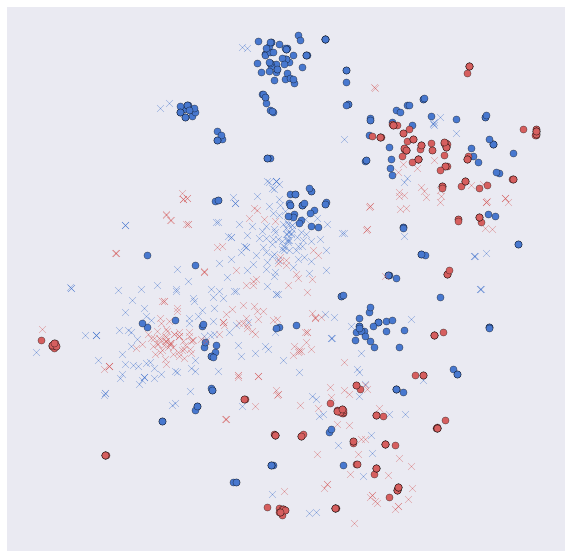

In [28]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for xp, yp, m, c in zip(tsne_nonadapted[:,0], tsne_nonadapted[:,1], marker, color):
    ax.scatter([xp],[yp], color=c, marker=m, linewidth=.3, edgecolor='black')
#ax.scatter(tsne_nonadapted[:,0], tsne_nonadapted[:,1], color=color, linewidth=.3, marker='o', edgecolor='black')
plt.savefig('tsne_nonadapted.eps', bbox_inches='tight', pad_inches=0)

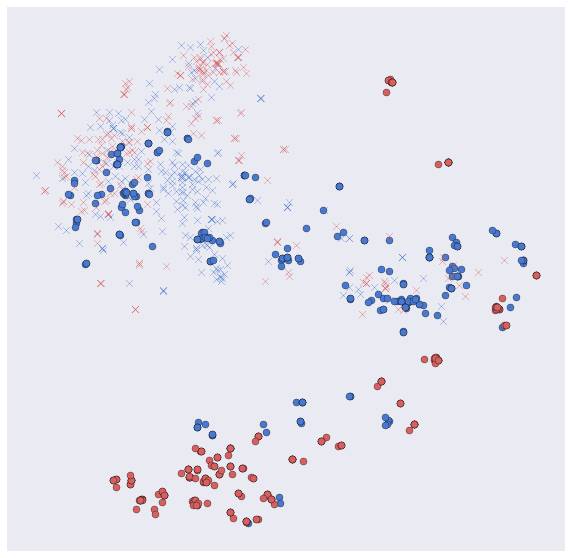

In [29]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for xp, yp, m, c in zip(tsne_dann[:,0], tsne_dann[:,1], marker, color):
    ax.scatter([xp],[yp], color=c, marker=m, linewidth=.3, edgecolor='black')
#ax.scatter(tsne_dann[:,0], tsne_dann[:,1], color=color, linewidth=.3, marker='o', edgecolor='black')
plt.savefig('tsne_dann.eps', bbox_inches='tight', pad_inches=0)

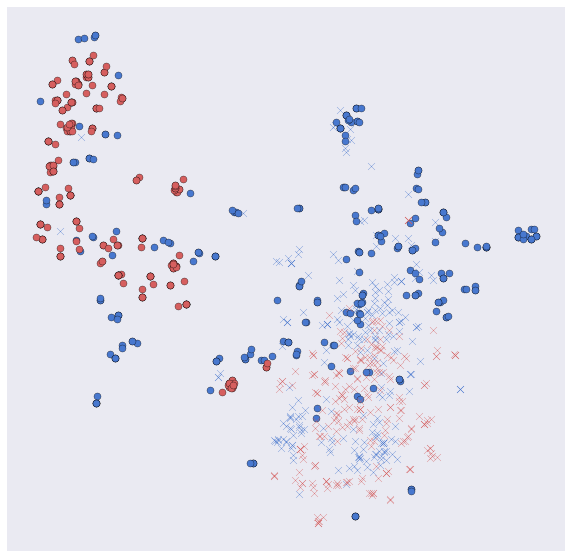

In [30]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for xp, yp, m, c in zip(tsne_vada[:,0], tsne_vada[:,1], marker, color):
    ax.scatter([xp],[yp], color=c, marker=m, linewidth=.3, edgecolor='black')
#ax.scatter(tsne_vada[:,0], tsne_vada[:,1], color=color, linewidth=.3, marker='o', edgecolor='black')
plt.savefig('tsne_emb_vada.eps', bbox_inches='tight', pad_inches=0)